<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Numerical Method in Finance

## Homework 3 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

In [49]:
import pandas as pd
import numpy as np
import math

# Question 1
Using either April 10th end of day market close data, replicate VIX index level via the VIX White paper
https://cdn.cboe.com/api/global/us_indices/governance/Cboe_Volatility_Index_Mathematics_Methodology.pdfLinks to an external site.

As discussed during the lecture, the VIX index calculation was motivated by the Carr-Madan formula we went through today in class.

## Interest Rate of Near Term and Next Term

In [47]:
# Read the CSV file
df = pd.read_csv('daily-treasury-rates.csv')

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Find the row for the current date (2023-04-10)
current_date = '2023-04-11'
current_row = df[df['Date'] == current_date].iloc[0]

# Define the expiration dates
expiration_date_1 = '2023-05-03'
expiration_date_2 = '2023-05-19'

# Calculate the days to expiration
days_to_expiration_1 = (pd.to_datetime(expiration_date_1) - pd.to_datetime(current_date)).days
days_to_expiration_2 = (pd.to_datetime(expiration_date_2) - pd.to_datetime(current_date)).days

# Define a function to perform linear interpolation between two rates
def interpolate_rate(rate1, rate2, days1, days2, target_days):
    return rate1 + (rate2 - rate1) * (target_days - days1) / (days2 - days1)

# Interpolate the risk-free interest rates for the expiration dates
risk_free_rate_1 = interpolate_rate(current_row['1 Mo'], current_row['2 Mo'], 30, 60, days_to_expiration_1)
risk_free_rate_2 = interpolate_rate(current_row['1 Mo'], current_row['2 Mo'], 30, 60, days_to_expiration_2)

# Print the risk-free interest rates
print(f"Risk-free interest rate for 2023/5/3: {risk_free_rate_1:.2f}%")
print(f"Risk-free interest rate for 2023/5/19: {risk_free_rate_2:.2f}%")


Risk-free interest rate for 2023/5/3: 4.10%
Risk-free interest rate for 2023/5/19: 4.44%


## Getting near term and next term order

In [42]:
df1 = pd.read_csv("2023-05-03.csv")
df2 = pd.read_csv("2023-05-19.csv")

## Create Order Book

In [43]:
strikes_1 = sorted(list(set(df1['Strike'].values)))
strikes_2 = sorted(list(set(df2['Strike'].values)))
order_book_01 = {
    'Strike': [],
    "Call_Bid": [],
    "Call_Ask": [],
    "Put_Bid": [],
    "Put_Ask": []
}
for i in range(len(strikes_1)):
    d = df1[df1['Strike'] == strikes_1[i]]
    order_book_01['Strike'].append(strikes_1[i])
    order_book_01['Call_Bid'].append(d[d['Type'] == 'Call']['Bid'].values[0])
    order_book_01['Call_Ask'].append(d[d['Type'] == 'Call']['Ask'].values[0])
    order_book_01['Put_Bid'].append(d[d['Type'] == 'Put']['Bid'].values[0])
    order_book_01['Put_Ask'].append(d[d['Type'] == 'Put']['Ask'].values[0])
order_book_01 = pd.DataFrame(order_book_01)
display(order_book_01)

order_book_02 = {
    'Strike': [],
    "Call_Bid": [],
    "Call_Ask": [],
    "Put_Bid": [],
    "Put_Ask": []
}
for i in range(len(strikes_2)):
    d = df2[df2['Strike'] == strikes_2[i]]
    order_book_02['Strike'].append(strikes_2[i])
    order_book_02['Call_Bid'].append(d[d['Type'] == 'Call']['Bid'].values[0])
    order_book_02['Call_Ask'].append(d[d['Type'] == 'Call']['Ask'].values[0])
    order_book_02['Put_Bid'].append(d[d['Type'] == 'Put']['Bid'].values[0])
    order_book_02['Put_Ask'].append(d[d['Type'] == 'Put']['Ask'].values[0])
order_book_02 = pd.DataFrame(order_book_02)
display(order_book_02)

,Strike,Call_Bid,Call_Ask,Put_Bid,Put_Ask
0,1200,2910.60,2916.00,0.0,0.1
1,1400,2711.40,2716.70,0.0,0.1
2,1600,2512.00,2517.30,0.0,0.1
3,1800,2312.60,2318.00,0.0,0.1
4,2000,2113.30,2118.70,0.0,0.1
...,...,...,...,...,...
93,4400,1.20,1.45,275.4,280.6
94,4500,0.25,0.40,374.0,379.3
95,4600,0.10,0.25,473.5,478.8
96,4800,0.00,0.10,672.8,678.1


,Strike,Call_Bid,Call_Ask,Put_Bid,Put_Ask
0,200,3903.1,3908.50,0.0,0.05
1,400,3704.2,3709.60,0.0,0.05
2,600,3505.3,3510.70,0.0,0.05
3,800,3306.5,3311.90,0.0,0.05
4,1000,3107.6,3113.00,0.0,0.05
...,...,...,...,...,...
325,6800,0.0,0.05,2654.6,2660.00
326,7000,0.0,0.05,2853.5,2858.90
327,7200,0.0,0.05,3052.4,3057.70
328,7400,0.0,0.05,3251.2,3256.60


## VIX Calculation

In [48]:
rates=[risk_free_rate_1 * 0.01, risk_free_rate_2* 0.01] 	
print('rates:', rates)			
datafiles=[order_book_01, order_book_02]		
verbose=1						

quotedata=[[], []]
for j in (0,1):
    f = datafiles[j]
    display(f)
    for line in f.index:
        ar=[]
        for v in f.iloc[line].values:
            ar.append(float(v))
        quotedata[j].append(ar)



date_1 = pd.Timestamp('2023-04-11')
date_2 = pd.Timestamp('2023-05-03')
date_3 = pd.Timestamp('2023-05-19')

# Calculate the difference in minutes between the dates
minutes_diff_1 = (date_2 - date_1).total_seconds() / 60
minutes_diff_2 = (date_3 - date_1).total_seconds() / 60
print(minutes_diff_1, minutes_diff_2)

Nt=[minutes_diff_1, minutes_diff_2]		#minutes
T=[Nt[0]/(60*24*365), Nt[1]/(60*24*365)]	#years

if(verbose>=1): 
	print('Nt:', Nt)
	print('T:', T)

#Step 1: Select the options to be used in the VIX Index calculation
#Compute F for near term and next term (p6)
F=[None, None]
for j in (0,1):
	mindiff=None
	diff=None
	mindiff=None
	Fstrike=None
	Fcall=None
	Fput=None
	for d in quotedata[j]:
		diff=abs( ((d[1]+d[2])/2) - ((d[3]+d[4])/2) )
		if(mindiff is None or diff<mindiff):
			mindiff=diff
			Fstrike=d[0]
			Fcall=(d[1]+d[2])/2
			Fput=(d[3]+d[4])/2
	F[j]=Fstrike + math.exp(rates[j]*T[j]) * (Fcall - Fput)

if(verbose>=1): print('F:', F)


#select the options to be used in the VIX Index calculation (p6,7)
selectedoptions=[[], []]
k0=[None, None]
for j in (0,1):
	i=0
	for d in quotedata[j]:
		if(d[0]<F[j]): 
			k0[j]=d[0]
			k0i=i
		i+=1

	d=quotedata[j][k0i]
	ar=[d[0], 'put/call average', (((d[1]+d[2])/2)+((d[3]+d[4])/2))/2]
	selectedoptions[j].append(ar)

	i=k0i-1
	b=True
	previousbid=None
	while(b and i>=0):
		d=quotedata[j][i]
		if(d[3]>0):
			ar=[d[0], 'put', (d[3]+d[4])/2]
			selectedoptions[j].insert(0,ar)
		else:
			if(previousbid==0): b=False
		previousbid=d[3]
		i-=1

	i=k0i+1
	b=True
	previousbid=None
	while(b and i<len(quotedata[j])):
		d=quotedata[j][i]
		if(d[1]>0):
			ar=[d[0], 'call', (d[1]+d[2])/2]
			selectedoptions[j].append(ar)
		else:
			if(previousbid==0): b=False
		previousbid=d[1]
		i+=1

if(verbose==2): 
	print('selectedoptions (near term):')
	for e in selectedoptions[0]: print('', e)
	print('selectedoptions (next term):')
	for e in selectedoptions[1]: print('', e)

#Step 2: Calculate volatility for both near-term and next-term options (p8)
for j in (0,1):
	i=0
	for d in selectedoptions[j]:
		if(i==0): 
			deltak=selectedoptions[j][1][0]-selectedoptions[j][0][0]
		elif(i==len(selectedoptions[j])-1):
			deltak=selectedoptions[j][i][0]-selectedoptions[j][i-1][0]
		else:
			deltak=(selectedoptions[j][i+1][0]-selectedoptions[j][i-1][0])/2
		contributionbystrike=(deltak/(d[0]*d[0])) * math.exp(rates[j]*T[j]) * d[2]
		selectedoptions[j][i].append(contributionbystrike)
		i+=1
if(verbose==2): 
	print('contributions by strike (near term):')
	for e in selectedoptions[0]: print('', e)
	print('contributions by strike (next term):')
	for e in selectedoptions[1]: print('', e)


aggregatedcontributionbystrike=[None, None]
for j in (0,1):
	aggregatedcontributionbystrike[j]=0
	for d in selectedoptions[j]:
		aggregatedcontributionbystrike[j]+=d[3]
	aggregatedcontributionbystrike[j]=(2/T[j])*aggregatedcontributionbystrike[j]


sigmasquared=[None, None]
for j in (0,1):
	sigmasquared[j]=aggregatedcontributionbystrike[j] - (1/T[j])*(F[j]/k0[j] -1)*(F[j]/k0[j] -1)

if(verbose): print('sigmasquared:', sigmasquared)

#Step 3: Calculate the 30-day weighted average of sigmasquared[0] and sigmasquared[1] (p9)
N30=30*1440
N365=365*1440
VIX=100 * math.sqrt( ((T[0]*sigmasquared[0])*(Nt[1]-N30)/(Nt[1]-Nt[0]) + (T[1]*sigmasquared[1])*(N30-Nt[0])/(Nt[1]-Nt[0]))*N365/N30 )

print('VIX:', VIX)


rates: [0.04104666666666666, 0.044353333333333335]


,Strike,Call_Bid,Call_Ask,Put_Bid,Put_Ask
0,1200,2910.60,2916.00,0.0,0.1
1,1400,2711.40,2716.70,0.0,0.1
2,1600,2512.00,2517.30,0.0,0.1
3,1800,2312.60,2318.00,0.0,0.1
4,2000,2113.30,2118.70,0.0,0.1
...,...,...,...,...,...
93,4400,1.20,1.45,275.4,280.6
94,4500,0.25,0.40,374.0,379.3
95,4600,0.10,0.25,473.5,478.8
96,4800,0.00,0.10,672.8,678.1


,Strike,Call_Bid,Call_Ask,Put_Bid,Put_Ask
0,200,3903.1,3908.50,0.0,0.05
1,400,3704.2,3709.60,0.0,0.05
2,600,3505.3,3510.70,0.0,0.05
3,800,3306.5,3311.90,0.0,0.05
4,1000,3107.6,3113.00,0.0,0.05
...,...,...,...,...,...
325,6800,0.0,0.05,2654.6,2660.00
326,7000,0.0,0.05,2853.5,2858.90
327,7200,0.0,0.05,3052.4,3057.70
328,7400,0.0,0.05,3251.2,3256.60


31680.0 54720.0
Nt: [31680.0, 54720.0]
T: [0.06027397260273973, 0.10410958904109589]
F: [4122.594054939267, 4127.789817773257]
sigmasquared: [0.0337138763438768, 0.03738342326129769]
VIX: 18.983656846063678


This result is approximate to the value that yahoo finance website provide. </br>
![](2023-04-22-15-57-22.png)

# Question 2
Use Black-Scholes formula and calculus to derive Gamma(d^2 C/dS^2) and Vega(dC/dsigma). Plot each as a function of spot price(S) and time to maturity(T), i.e. </br>
Each plot should have multiple curves each corresponding to different time to maturity but sharing the same x-axis(spot level). </br>
You should have two plots, one for Gamma and one for Vega.

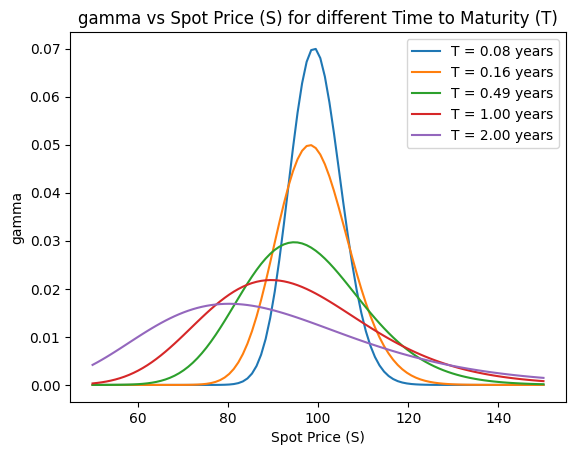

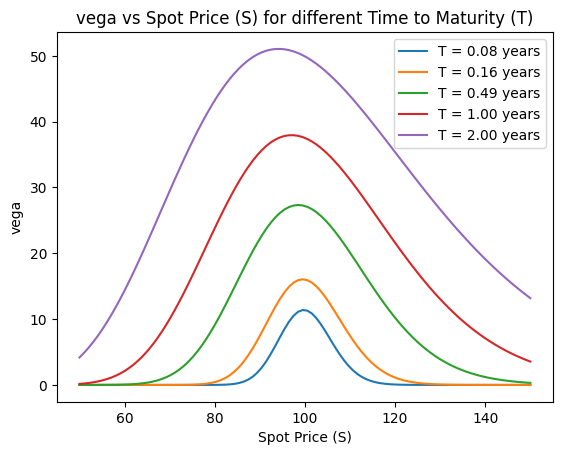

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

def gamma(S, K, T, r, sigma):
    d1, _ = black_scholes(S, K, T, r, sigma)
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    d1, _ = black_scholes(S, K, T, r, sigma)
    return S * norm.pdf(d1) * np.sqrt(T)

def plot_greeks(greek_func, time_to_maturities, S, K, r, sigma):
    plt.figure()
    for T in time_to_maturities:
        greek_values = [greek_func(s, K, T, r, sigma) for s in S]
        plt.plot(S, greek_values, label=f'T = {T:.2f} years')

    plt.xlabel('Spot Price (S)')
    plt.ylabel(greek_func.__name__)
    plt.legend()
    plt.title(f'{greek_func.__name__} vs Spot Price (S) for different Time to Maturity (T)')
    plt.show()

if __name__ == "__main__":
    S = np.linspace(50, 150, 100)
    K = 100
    r = 0.05
    sigma = 0.2
    time_to_maturities = [30 / 365, 60 / 365, 180 / 365, 365 / 365, 730 / 365]

    plot_greeks(gamma, time_to_maturities, S, K, r, sigma)
    plot_greeks(vega, time_to_maturities, S, K, r, sigma)


<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>